<a href="https://colab.research.google.com/github/mwasalski/Data_Science_Bootcamp/blob/main/Por%C3%B3wnanie_python_z_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [4]:

url = ('https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/online_retail.xlsx')
retail_raw = pd.read_excel(url)
retail_raw.head()
     

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
retail = retail_raw.copy()
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [14]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
retail = retail.dropna()
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
retail[retail.Quantity >= 0]
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [21]:
retail.CustomerID = retail.CustomerID.apply(lambda x: str(int(x)))
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


##Porównania

In [23]:
# Select * from retail

retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [25]:
# select quantity, unitprice, CustomerID from retail

retail[['Quantity','CustomerID']]

,Quantity,CustomerID
0,6,17850
1,6,17850
2,8,17850
3,6,17850
4,6,17850
...,...,...
541904,12,12680
541905,6,12680
541906,4,12680
541907,4,12680


In [27]:
# select quantity, unitprice, CustomerID from retail limit 10

# retail[['Quantity','CustomerID']].head(10)
retail[['Quantity','CustomerID']][:10]

,Quantity,CustomerID
0,6,17850
1,6,17850
2,8,17850
3,6,17850
4,6,17850
5,2,17850
6,6,17850
7,6,17850
8,6,17850
9,32,13047


In [29]:
# select quantity, unitprice, CustomerID from retail where customerId = 'xxx'


retail[retail.CustomerID == '17850']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
86898,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom
86899,C543611,21874,GIN AND TONIC MUG,-1,2011-02-10 14:38:00,1.06,17850,United Kingdom
86900,C543611,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,-2,2011-02-10 14:38:00,2.75,17850,United Kingdom
86901,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom


In [31]:
retail.query('CustomerID == "17850"')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
86898,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom
86899,C543611,21874,GIN AND TONIC MUG,-1,2011-02-10 14:38:00,1.06,17850,United Kingdom
86900,C543611,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,-2,2011-02-10 14:38:00,2.75,17850,United Kingdom
86901,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom


In [32]:
# select quantity, unitprice, CustomerID from retail where customerId = 'xxx' and unitprice > 5
retail[(retail.CustomerID == '17850') & (retail.UnitPrice >5)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
58,536373,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 09:02:00,6.95,17850,United Kingdom
63,536373,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 09:02:00,7.65,17850,United Kingdom
75,536375,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 09:32:00,6.95,17850,United Kingdom
80,536375,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 09:32:00,7.65,17850,United Kingdom
288,536396,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 10:51:00,6.95,17850,United Kingdom
293,536396,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 10:51:00,7.65,17850,United Kingdom
294,536396,22803,IVORY EMBROIDERED QUILT,2,2010-12-01 10:51:00,35.75,17850,United Kingdom
425,536406,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 11:33:00,6.95,17850,United Kingdom
430,536406,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 11:33:00,7.65,17850,United Kingdom


In [36]:
# select quantity, unitprice, CustomerID from retail where customerId = 'xxx' or country = 'France'
retail[(retail.CustomerID == '17850') | (retail.Country == 'France')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [37]:
#select * where InvoiceNo is not null;

retail[retail.InvoiceNo.notnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [38]:
# select customerid, count(*) From retail Group by CustomerID;

retail.groupby('CustomerID').size()

CustomerID
12346      2
12347    182
12348     31
12349     73
12350     17
        ... 
18280     10
18281      7
18282     13
18283    756
18287     70
Length: 4372, dtype: int64

In [39]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [41]:
retail['Revenue'] = retail.Quantity * retail.UnitPrice
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [45]:
retail.groupby('CustomerID').aggregate({'Revenue': np.mean, 'CustomerID': np.size})

,Revenue,CustomerID
CustomerID,,
12346,0.000000,2
12347,23.681319,182
12348,57.975484,31
12349,24.076027,73
12350,19.670588,17
...,...,...
18280,18.060000,10
18281,11.545714,7
18282,13.584615,13


In [48]:
retail.groupby('CustomerID').aggregate({'Revenue': np.mean, 'CustomerID': np.size}) \
  .rename(columns = {'Revenue':'Revenue_average', 'CustomerID':'CustomerID_count'})

,Revenue_average,CustomerID_count
CustomerID,,
12346,0.000000,2
12347,23.681319,182
12348,57.975484,31
12349,24.076027,73
12350,19.670588,17
...,...,...
18280,18.060000,10
18281,11.545714,7
18282,13.584615,13


In [49]:
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [50]:
retail['InvoiceDateDay'] = retail.InvoiceDate.dt.day
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDateDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,1


In [52]:
# select invoicedateday, sum(revenue) from retail group by invoicedateday

results = retail.groupby('InvoiceDateDay').aggregate({'Revenue':np.sum})

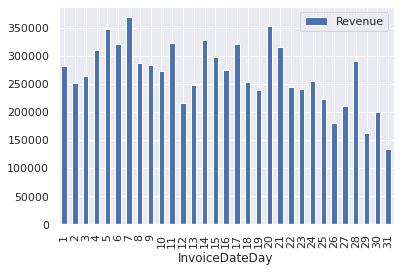

In [55]:
import seaborn as sns

sns.set()

_ = results.plot(kind = 'bar')

In [57]:
# select * from retail order by quanity desc limit 5;

retail.nlargest(n=5, columns='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDateDay
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,9
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,18
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom,0.0,25
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom,1008.0,27
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom,3096.0,27


In [58]:
# select * from retail order by quanity desc limit 5;


retail.nsmallest(n=5, columns='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDateDay
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,-168469.6,9
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.6,18
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom,-280.8,2
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749,United Kingdom,-6539.4,18
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749,United Kingdom,-3700.0,18
